## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Standardisation**.

=================================================================

## Standardisation


Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the techniques discussed in variable transformation.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

## In this demo

We will perform standardisation using Scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

3.DATASET
The dataset for this paper has been obtained 
from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Automobile).

This data set consists of three types of entities: (a) the specification of an auto in terms of various 
characteristics, (b)its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky 
(or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process 
“symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized 
for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…),
and represents the average loss per car per year.

There are total 205 instances and 26 attributes out of which 15 are continuous, 1 is integer and 
10 are nominal. There are missing values as well.

In [2]:
# let's load the imports-85-clean-data.csv dataset

data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\automobile data set\\imports-85-clean-data.csv')


In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,128.576317,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,104.848780,5125.369458,25.219512,30.751220,13321.278623
std,1.245307,38.606463,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,39.969861,476.979093,6.542142,6.886443,8095.996440
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,125.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note for this demo, how **the mean values are not centered at zero, and the standard deviations are not scaled to 1**.

When standardising the data set, we need to first identify the mean and standard deviation of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
data.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [5]:
inputs = data.drop(['price'], axis = 1)
target = data.price

In [6]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((143, 25), (62, 25))

In [7]:
X_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
177,-1,65.000000,toyota,gas,std,four,hatchback,fwd,front,102.4,...,four,122,mpfi,3.31,3.54,8.7,92,4200.0,27,32
75,1,128.414508,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,four,140,mpfi,3.78,3.12,8.0,175,5000.0,19,24
174,-1,65.000000,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,four,110,idi,3.27,3.35,22.5,73,4500.0,30,33
31,2,137.000000,honda,gas,std,two,hatchback,fwd,front,86.6,...,four,92,1bbl,2.91,3.41,9.2,76,6000.0,31,38
12,0,188.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,six,164,mpfi,3.31,3.19,9.0,121,4250.0,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,231.000000,nissan,gas,std,two,hatchback,rwd,front,99.2,...,six,181,mpfi,3.43,3.27,9.0,160,5200.0,19,25
14,1,192.000000,bmw,gas,std,four,sedan,rwd,front,103.5,...,six,164,mpfi,3.31,3.19,9.0,121,4250.0,20,25
92,1,122.000000,nissan,gas,std,four,sedan,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69,5200.0,31,37
179,3,197.000000,toyota,gas,std,two,hatchback,rwd,front,102.9,...,six,171,mpfi,3.27,3.35,9.3,161,5200.0,19,24


In [8]:
# we need to identify the numerical variables that can be Standardized

In [9]:
# find numerical variables
#those different from object and also excluding the target Price
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='price']

In [10]:
features_numerical

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [11]:
X_train_temp = X_train[features_numerical]
X_test_temp = X_test[features_numerical]


In [12]:
X_train_temp.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
177,-1,65.000000,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200.0,27,32
75,1,128.414508,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000.0,19,24
174,-1,65.000000,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,4500.0,30,33
31,2,137.000000,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000.0,31,38
12,0,188.000000,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250.0,21,28


In [13]:
X_test_temp.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
15,0,192.0,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.00,182,5400.0,16,22
9,0,158.0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500.0,16,22
100,0,106.0,97.2,173.4,65.2,54.7,2302,120,3.33,3.47,8.50,97,5200.0,27,34
132,3,150.0,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,9.31,110,5250.0,21,28
68,-1,93.0,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,21.50,123,4350.0,22,25


### Standardisation

The StandardScaler from scikit-learn removes the mean and scales the data to unit variance. Plus, it learns and stores the parameters needed for scaling. Thus, it is top choice for this feature scaling technique.

On the downside, you can't select which variables to scale directly, it will scale the entire data set, and it returns a NumPy array, without the variable values.

In [14]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_temp)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_temp)
X_test_scaled = scaler.transform(X_test_temp)

In [15]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([8.46153846e-01, 1.28739375e+02, 9.89300699e+01, 1.74655245e+02,
       6.59888112e+01, 5.37916084e+01, 2.57323776e+03, 1.27013986e+02,
       3.31706294e+00, 3.25608392e+00, 9.98398601e+00, 1.06748252e+02,
       5.15490027e+03, 2.48181818e+01, 3.03216783e+01])

In [16]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([1.23076923e+00, 3.87748902e+01, 6.05246335e+00, 1.23638299e+01,
       2.17429693e+00, 2.47138863e+00, 5.20538639e+02, 4.12913892e+01,
       2.72847795e-01, 3.06617082e-01, 3.73190874e+00, 4.07539896e+01,
       4.85454725e+02, 5.89492654e+00, 6.21030206e+00])

In [17]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_temp.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test_temp.columns)

In [18]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_temp.describe(), 1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0
mean,0.8,128.7,98.9,174.7,66.0,53.8,2573.2,127.0,3.3,3.3,10.0,106.7,5154.9,24.8,30.3
std,1.2,38.9,6.1,12.4,2.2,2.5,522.4,41.4,0.3,0.3,3.7,40.9,487.2,5.9,6.2
min,-2.0,65.0,86.6,144.6,61.8,47.8,1819.0,70.0,2.5,2.1,7.0,52.0,4150.0,13.0,16.0
25%,0.0,95.0,94.5,166.8,64.2,52.0,2190.5,98.0,3.1,3.1,8.6,74.5,4800.0,19.0,25.0
50%,1.0,125.0,97.2,173.4,65.5,54.1,2443.0,120.0,3.3,3.3,9.0,97.0,5200.0,24.0,30.0
75%,2.0,154.0,102.2,184.6,66.9,55.7,2953.0,141.0,3.5,3.4,9.4,118.5,5500.0,30.0,34.0
max,3.0,256.0,115.6,202.6,72.3,59.8,4066.0,326.0,3.9,4.2,23.0,288.0,6600.0,38.0,47.0


In [19]:
# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.3,-1.6,-2.0,-2.4,-1.9,-2.4,-1.4,-1.4,-2.8,-3.9,-0.8,-1.3,-2.1,-2.0,-2.3
25%,-0.7,-0.9,-0.7,-0.6,-0.8,-0.7,-0.7,-0.7,-0.6,-0.5,-0.4,-0.8,-0.7,-1.0,-0.9
50%,0.1,-0.1,-0.3,-0.1,-0.2,0.1,-0.3,-0.2,-0.0,0.0,-0.3,-0.2,0.1,-0.1,-0.1
75%,0.9,0.7,0.5,0.8,0.4,0.8,0.7,0.3,0.8,0.5,-0.2,0.3,0.7,0.9,0.6
max,1.7,3.3,2.8,2.3,2.9,2.4,2.9,4.8,2.3,3.0,3.5,4.4,3.0,2.2,2.7


As expected, the mean of each variable, which were not centered at zero, is now around zero and the standard deviation is set to 1. Note however, that the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

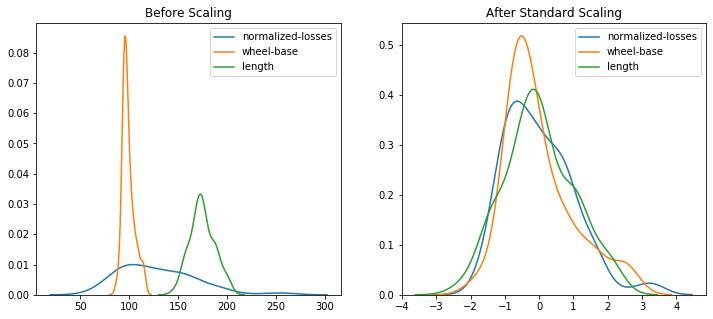

In [20]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)
sns.kdeplot(X_train_temp['length'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
sns.kdeplot(X_train_scaled['length'], ax=ax2)

plt.show()

Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables. 

Note something interesting in the following plot: 

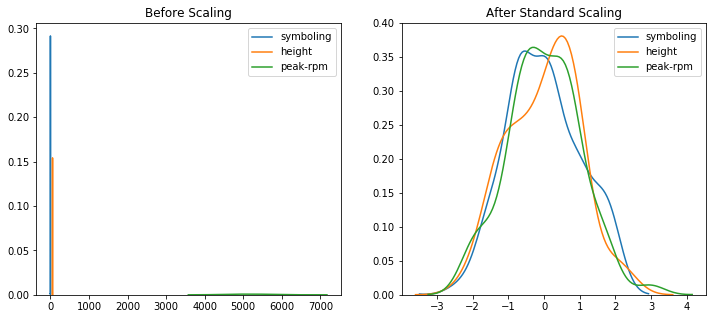

In [21]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_temp['symboling'], ax=ax1)
sns.kdeplot(X_train_temp['height'], ax=ax1)
sns.kdeplot(X_train_temp['peak-rpm'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
sns.kdeplot(X_train_scaled['height'], ax=ax2)
sns.kdeplot(X_train_scaled['peak-rpm'], ax=ax2)

plt.show()

In [22]:
X_train_temp['peak-rpm'].min(), X_train_temp['peak-rpm'].max(), 

(4150.0, 6600.0)

In [23]:
X_train_temp['symboling'].min(), X_train_temp['symboling'].max(), 

(-2, 3)

In the above plot, we can see how, by scaling, the variable symboling, which varied across a very narrow range of values [-2, 3] , and peak-rpm which varied across [4150.0, 6600.0], now spread over a more homogeneous range of values, so that we can compare them directly in one plot, whereas before it was difficult. In a linear model, peak-rpm would dominate the output, but after standardisation, both variables will be able to have an input (assuming that they are both predictive).  

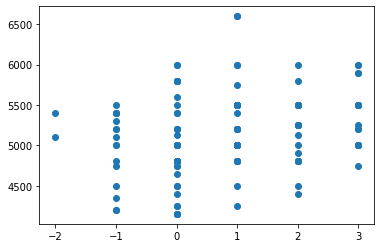

In [24]:
plt.scatter(X_train_temp['symboling'], X_train_temp['peak-rpm'])

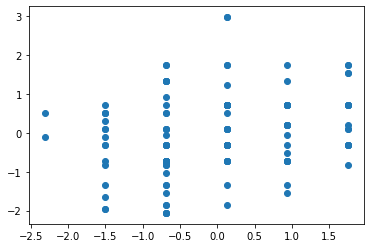

In [25]:
plt.scatter(X_train_scaled['symboling'], X_train_scaled['peak-rpm'])

Adding the categorical variables to X_train_scaled and X_test_scaled

In [26]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in data.columns if data[c].dtypes=='O']

In [27]:
features_categorical

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [29]:
X_train_scaled = X_train_scaled.set_index(X_train.index)

In [30]:
X_train_scaled[features_categorical] = X_train[features_categorical]

In [31]:
X_train_scaled

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
177,-1.5000,-1.643831,0.573309,0.076413,0.235105,0.043859,-0.221382,-0.121429,-0.025886,0.925963,...,toyota,gas,std,four,hatchback,fwd,front,ohc,four,mpfi
75,0.1250,-0.008378,0.622875,0.302880,0.924984,0.408026,0.646950,0.314497,1.696686,-0.443824,...,mercury,gas,turbo,two,hatchback,rwd,front,ohc,four,mpfi
174,-1.5000,-1.643831,0.573309,0.076413,0.235105,0.448489,-0.179118,-0.412047,-0.172488,0.306298,...,toyota,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
31,0.9375,0.213041,-2.037199,-2.430901,-0.960684,-1.210497,-1.448956,-0.847973,-1.491905,0.501981,...,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
12,-0.6875,1.528325,0.375042,0.173470,-0.546757,0.205711,0.262732,0.895732,-0.025886,-0.215526,...,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.1250,2.637290,0.044598,0.310968,0.878992,-1.655591,1.086878,1.307440,0.413920,0.045386,...,nissan,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
14,0.1250,1.631484,0.755053,1.160219,0.419073,0.772194,0.925507,0.895732,-0.025886,-0.215526,...,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi
92,0.1250,-0.173808,-0.731945,-0.756662,-1.006675,0.286637,-1.220347,-0.726882,-0.612294,0.110614,...,nissan,gas,std,four,sedan,fwd,front,ohc,four,2bbl
179,1.7500,1.760434,0.655920,0.715373,0.787008,-0.724940,0.850585,1.065259,-0.172488,0.306298,...,toyota,gas,std,two,hatchback,rwd,front,dohc,six,mpfi


In [32]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [33]:
X_test_scaled[features_categorical] = X_test[features_categorical]

In [34]:
X_test_scaled

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
15,-0.6875,1.631484,0.755053,1.160219,0.419073,0.772194,1.261697,1.985547,1.110279,0.436754,...,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi
9,-0.6875,0.754628,0.094165,0.286704,0.878992,-0.724940,0.921665,0.096534,-0.685594,0.469367,...,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi
100,-0.6875,-0.586446,-0.285846,-0.101526,-0.362789,0.367563,-0.521071,-0.169866,0.047415,0.697665,...,nissan,gas,std,four,sedan,fwd,front,ohc,four,2bbl
132,1.7500,0.548309,0.028076,0.966105,0.235105,0.934046,0.162836,-0.145647,0.817075,-0.606894,...,saab,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
68,-1.5000,-0.921714,1.828996,1.313893,1.982797,1.986087,2.260663,1.355876,0.963677,1.252103,...,mercedes-benz,diesel,turbo,four,wagon,rwd,front,ohc,five,idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.7500,0.548309,-0.599767,-0.457402,-0.132830,-1.696054,-0.371227,-1.380772,-0.868847,-0.345982,...,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
128,1.7500,1.476745,-1.558055,-0.465490,-0.454773,-0.886792,0.435630,1.622276,1.550084,-1.161331,...,porsche,gas,std,two,convertible,rwd,rear,ohcf,six,mpfi
76,0.9375,0.831998,-0.864123,-1.403711,-0.730724,-1.210497,-1.258769,-0.847973,-1.272002,-0.085070,...,mitsubishi,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
144,-0.6875,-0.689605,-0.318890,-0.214759,-0.270805,0.205711,-0.361621,-0.460483,1.110279,-2.009294,...,subaru,gas,std,four,sedan,4wd,front,ohcf,four,2bbl
